# US Census Classifier to Predict Salary - Michael
First, we are going to import the data from adult.csv, that includes 15 columns of data. Then, we set the column names to the data as they previously were not set. 

Train = Training Data and 
Test = Test Data




In [79]:
import pandas as pd 
import seaborn as sns
import sklearn
import numpy as np

data = pd.read_csv('../../data/adult.csv')

split = int(np.ceil(len(data) * .8))

train = data.iloc[:split,:].copy()
test = data.iloc[split:,:].copy()


train.columns = ["age", "workclass", "fnlwgt", "education", "education-num", 
                 "marital-status", "occupation", "relationship", "race", "sex", 
                 "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

test.columns = ["age", "workclass", "fnlwgt", "education", "education-num", 
                 "marital-status", "occupation", "relationship", "race", "sex", 
                 "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]


# Begin Pre-Processing
As we notice there are some values in the data with "?", so we must replace these in order to train our model correctly. We are just going to use the most frequent values. Then we are going to check the skewness of the data before any transformation. 


In [80]:

train = train.dropna()
test = test.dropna()

# replace missing values in the train set
train.loc[train["workclass"] == "?", "workclass"] = "Private"
train.loc[train["occupation"] == "?", "occupation"] = "Prof-speciality"
train.loc[train["native-country"] == "?", "native-country"] = "United-States"

# replace missing values in the test set
test.loc[test["workclass"] == "?", "workclass"] = "Private"
test.loc[test["occupation"] == "?", "occupation"] = "Prof-speciality"
test.loc[test["native-country"] == "?", "native-country"] = "United-States"


test = test.drop(columns=["capital-gain"])
test = test.drop(columns=["capital-loss"])

train = train.drop(columns=["capital-gain"])
train = train.drop(columns=["capital-loss"])


test.loc[:, "income"] = test["income"].str.rstrip('.')

print(train.skew(numeric_only=True))
print(test.skew(numeric_only=True))


age               0.567076
fnlwgt            1.445698
education-num    -0.311052
hours-per-week    0.227463
dtype: float64
age               0.518113
fnlwgt            1.412366
education-num    -0.336920
hours-per-week    0.282131
dtype: float64


# Encoding
Now, we must encode the data in order for the classification model to work. Data needs to be in an 'int/float' format. We are going to use the LabelEncoder provided by sklearn. 


In [81]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()

train["workclass"] = le.fit_transform(train["workclass"])
train["education"] = le.fit_transform(train["education"])
train["education-num"] = le.fit_transform(train["education-num"])
train["marital-status"] = le.fit_transform(train["marital-status"])
train["occupation"] = le.fit_transform(train["occupation"])
train["relationship"] = le.fit_transform(train["relationship"])
train["race"] = le.fit_transform(train["race"])
train["sex"] = le.fit_transform(train["sex"])

train["native-country"] = le.fit_transform(train["native-country"])
test["workclass"] = le.fit_transform(test["workclass"])
test["education"] = le.fit_transform(test["education"])
test["education-num"] = le.fit_transform(test["education-num"])
test["marital-status"] = le.fit_transform(test["marital-status"])
test["occupation"] = le.fit_transform(test["occupation"])
test["relationship"] = le.fit_transform(test["relationship"])
test["race"] = le.fit_transform(test["race"])
test["sex"] = le.fit_transform(test["sex"])
test["native-country"] = le.fit_transform(test["native-country"])

print(train.head())
print(test.head())


   age  workclass  fnlwgt  education  education-num  marital-status  \
0   25          3  226802          1              6               4   
1   38          3   89814         11              8               2   
2   28          1  336951          7             11               2   
3   44          3  160323         15              9               2   
4   18          3  103497         15              9               4   

   occupation  relationship  race  sex  hours-per-week  native-country income  
0           6             3     2    1              40              38  <=50K  
1           4             0     4    1              50              38  <=50K  
2          11             0     4    1              40              38   >50K  
3           6             0     2    1              40              38   >50K  
4           9             3     4    0              30              38  <=50K  
       age  workclass  fnlwgt  education  education-num  marital-status  \
39074   39        

# Scaling
Now, we are going to prepare our train and test sets to use in the model. We use StandardScaler to transform the data such that the mean is 0 and the standard deviation is 1. This is important as our data ranges greatly with each feature. It will help our model learn better.



In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train_x = train.drop("income", axis = 'columns')
train_y = train['income']

test_x = test.drop("income", axis = 'columns')
test_y = test['income']

train_set = sc.fit_transform(train_x)
test_set = sc.fit_transform(test_x)

x_train = pd.DataFrame(train_set, columns=train_x.columns)
x_test = pd.DataFrame(test_set, columns=test_x.columns)

print(x_train)
print(x_test)

            age  workclass    fnlwgt  education  education-num  \
0     -0.994791  -0.088741  0.353866  -2.402897      -1.202330   
1     -0.048466  -0.088741 -0.947357   0.182900      -0.421467   
2     -0.776408  -1.883496  1.400151  -0.851419       0.749828   
3      0.388300  -0.088741 -0.277605   1.217219      -0.031035   
4     -1.504351  -0.088741 -0.817385   1.217219      -0.031035   
...         ...        ...       ...        ...            ...   
39069 -1.285968  -0.088741 -0.436416   1.217219      -0.031035   
39070 -0.266848  -0.088741 -0.144764   1.217219      -0.031035   
39071 -0.558025   1.706014 -0.256442  -2.144317      -0.811899   
39072  0.024329   0.808636  1.738062   0.441479       1.530691   
39073 -0.630820  -0.088741 -1.086486  -0.334260       1.140259   

       marital-status  occupation  relationship      race       sex  \
0            0.914849   -0.112977      0.971667 -1.978313  0.704638   
1           -0.410260   -0.571814     -0.902008  0.390945  0.7046

# Training
Now, we are going to actually train the model using the fit method. For this example, I decided to use a Gaussian Naive Bayes classifier as we talked a lot about it in class. I fit the training data x values with their corresponding y values. Afterwards, I used the test values to come up with predicted y values, and used the "accuracy_score" method to determine how accurate each prediction was on the test data, and the training

In [89]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

mapped_y = test_y.map({'<=50K': 0, '>50K': 1})

nb = GaussianNB()
lr = LogisticRegression()
kn = KNeighborsClassifier(22) # Default is 5

classifiers = [nb, lr, kn]
result_array = []

def map_prediction(prediction): 
  if prediction == '<=50K':
      return 0
  elif prediction == '>50K':
      return 1
  else: 
      raise Exception("Something wrong with data")
  
accuracy_scores = []

for classifier in classifiers:
  classifier.fit(x_train, train_y)
  prediction = classifier.predict(x_test)

  test_score = accuracy_score(test_y, prediction)
  train_score = accuracy_score(train_y, classifier.predict(x_train))

  mapped_prediction = []
  for i, element in enumerate(prediction):
    mapped_prediction.append(map_prediction(element))
  accuracy_scores.append(test_score)
  print("For Classifier = " + str(classifier))
  print("Accuracy score for train data = ", train_score)
  print("Accuracy score for test data = ", test_score)
  print("ROC AUC Score = ", roc_auc_score(test_y, mapped_prediction))
  print("Classification Report:\n", classification_report(test_y, prediction))
  print("Model Confusion Matrix:\n", confusion_matrix(test_y, prediction))
  print("\n\n")

For Classifier = GaussianNB()
Accuracy score for train data =  0.7776270665915954
Accuracy score for test data =  0.7813267813267813
ROC AUC Score =  0.755927338195168
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.81      0.85      7364
        >50K       0.54      0.71      0.61      2404

    accuracy                           0.78      9768
   macro avg       0.72      0.76      0.73      9768
weighted avg       0.81      0.78      0.79      9768

Model Confusion Matrix:
 [[5935 1429]
 [ 707 1697]]



For Classifier = LogisticRegression()
Accuracy score for train data =  0.804703895173261
Accuracy score for test data =  0.8055896805896806
ROC AUC Score =  0.6704547508633538
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88      7364
        >50K       0.68      0.40      0.51      2404

    accuracy                           0.81      9768
   macro

# Cross Validation
Here, we are performing ten fold cross validation to determine which K is the best value to try. 

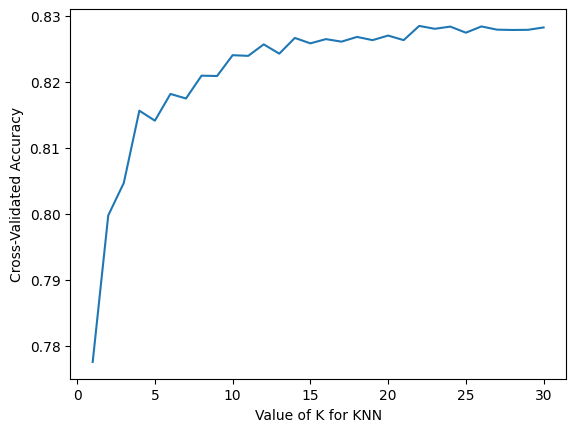

In [92]:
from sklearn.model_selection import cross_val_score

# try k values from 1 to 30
k_range = range(1, 31)
k_scores = []

# perform 10-fold cross-validation for each k value
for k in k_range:
    kn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(kn, x_train, train_y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# plot the accuracy for each k value
import matplotlib.pyplot as plt

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


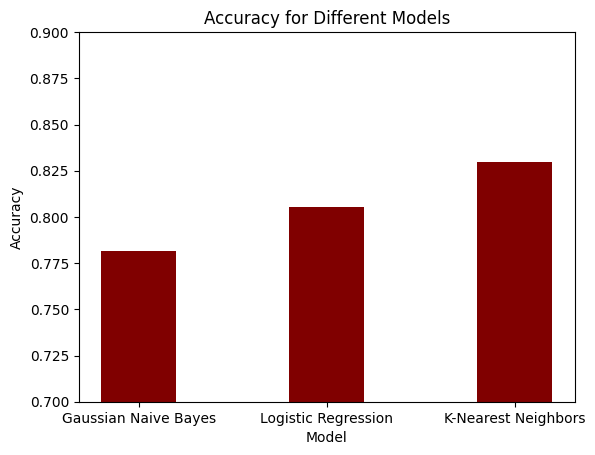

In [91]:
import matplotlib.pyplot as plt

models = ['Gaussian Naive Bayes', 'Logistic Regression', 'K-Nearest Neighbors']

plt.bar(models, accuracy_scores, color ='maroon', width = 0.4)

plt.ylim([0.7, 0.9])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Models")

plt.show()

# Conclusion
To conclude, it seems that our accuracy score for the training and test data is around 82%. Our classification report shows precision, recall, and f1-score for salaries greater than 50k and less than or equal to 50k. Overall, I would say the classifier worked pretty well. 


# Improvements to be made. 
I think there are many improvements that could be made in order to improve the accuracy and also simplify the features.

*   Combine similar features. I think it would be very beneficial to combine features like "education" and "education-num", "marital-status" and "relationship" and others. This would make the input data a lot simpler, and also allow for an easier set up to input 

*   Try different classifiers provided by SciKit. Right now, all I have used is Naive-Bayes but there are many different classifiers that can be used. 

*   Find outliers and handle accordingly. 

*   Use graphs/maps to display data for easier consumption. 

*   Hyperparameter optimization. I have not attempted any hyperparemeter tuning yet but plan to in the near future. 

